<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.241113,54.158672,68.632748,-0.350386,217.682147,217.990031,-0.307885
1,0.0,1.0,85.494701,87.665408,43.872749,-0.231046,226.801813,226.957899,-0.156086
2,0.0,2.0,50.702673,47.199971,24.553613,-0.042338,132.413918,132.452651,-0.038734
3,0.0,3.0,23.188101,62.273912,76.277874,0.097176,171.837064,171.751349,0.085715
4,0.0,4.0,61.251065,30.946583,42.849511,-0.034343,145.012816,145.049007,-0.036192
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.893815,73.603014,92.967984,0.054713,211.519525,211.461059,0.058466
119996,999.0,116.0,81.798684,46.477149,85.730470,0.103534,224.109837,223.984582,0.125255
119997,999.0,117.0,94.052280,78.290135,48.981366,0.218129,231.541909,231.329563,0.212347
119998,999.0,118.0,43.022646,84.520331,66.001793,0.083071,203.627841,203.569716,0.058126


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.241113,54.158672,68.632748,-0.350386,217.682147,217.990031,-0.307885
1,0.0,1.0,85.494701,87.665408,43.872749,-0.231046,226.801813,226.957899,-0.156086
2,0.0,2.0,50.702673,47.199971,24.553613,-0.042338,132.413918,132.452651,-0.038734
3,0.0,3.0,23.188101,62.273912,76.277874,0.097176,171.837064,171.751349,0.085715
4,0.0,4.0,61.251065,30.946583,42.849511,-0.034343,145.012816,145.049007,-0.036192
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.893815,73.603014,92.967984,0.054713,211.519525,211.461059,0.058466
119996,999.0,116.0,81.798684,46.477149,85.730470,0.103534,224.109837,223.984582,0.125255
119997,999.0,117.0,94.052280,78.290135,48.981366,0.218129,231.541909,231.329563,0.212347
119998,999.0,118.0,43.022646,84.520331,66.001793,0.083071,203.627841,203.569716,0.058126


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    85.241113  54.158672  68.632748  ...  217.682147  217.990031 -0.307885
      1.0    85.494701  87.665408  43.872749  ...  226.801813  226.957899 -0.156086
      2.0    50.702673  47.199971  24.553613  ...  132.413918  132.452651 -0.038734
      3.0    23.188101  62.273912  76.277874  ...  171.837064  171.751349  0.085715
      4.0    61.251065  30.946583  42.849511  ...  145.012816  145.049007 -0.036192
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  34.893815  73.603014  92.967984  ...  211.519525  211.461059  0.058466
      116.0  81.798684  46.477149  85.730470  ...  224.109837  223.984582  0.125255
      117.0  94.052280  78.290135  48.981366  ...  231.541909  231.329563  0.212347
      118.0  43.022646  84.520331  66.001793  ...  203.627841  203.569716  0.058126
      119.0  42.832829  74.488827  22.736938  ...  149.857157  150.159655 -0.302498

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    85.241113  54.158672  68.632748  ...  217.682147  217.990031 -0.307885
      1.0    85.494701  87.665408  43.872749  ...  226.801813  226.957899 -0.156086
      2.0    50.702673  47.199971  24.553613  ...  132.413918  132.452651 -0.038734
      3.0    23.188101  62.273912  76.277874  ...  171.837064  171.751349  0.085715
      4.0    61.251065  30.946583  42.849511  ...  145.012816  145.049007 -0.036192
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  34.893815  73.603014  92.967984  ...  211.519525  211.461059  0.058466
      116.0  81.798684  46.477149  85.730470  ...  224.109837  223.984582  0.125255
      117.0  94.052280  78.290135  48.981366  ...  231.541909  231.329563  0.212347
      118.0  43.022646  84.520331  66.001793  ...  203.627841  203.569716  0.058126
      119.0  42.832829  74.488827  22.736938  ...  149.857157  150.159655 -0.302498

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.241113,54.158672,68.632748,-0.350386,217.682147,217.990031,-0.307885
1,0.0,1.0,85.494701,87.665408,43.872749,-0.231046,226.801813,226.957899,-0.156086
2,0.0,2.0,50.702673,47.199971,24.553613,-0.042338,132.413918,132.452651,-0.038734
3,0.0,3.0,23.188101,62.273912,76.277874,0.097176,171.837064,171.751349,0.085715
4,0.0,4.0,61.251065,30.946583,42.849511,-0.034343,145.012816,145.049007,-0.036192
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.893815,73.603014,92.967984,0.054713,211.519525,211.461059,0.058466
119996,999.0,116.0,81.798684,46.477149,85.730470,0.103534,224.109837,223.984582,0.125255
119997,999.0,117.0,94.052280,78.290135,48.981366,0.218129,231.541909,231.329563,0.212347
119998,999.0,118.0,43.022646,84.520331,66.001793,0.083071,203.627841,203.569716,0.058126


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    85.241113  54.158672  68.632748  ...  217.682147  217.990031 -0.307885
      1.0    85.494701  87.665408  43.872749  ...  226.801813  226.957899 -0.156086
      2.0    50.702673  47.199971  24.553613  ...  132.413918  132.452651 -0.038734
      3.0    23.188101  62.273912  76.277874  ...  171.837064  171.751349  0.085715
      4.0    61.251065  30.946583  42.849511  ...  145.012816  145.049007 -0.036192
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  34.893815  73.603014  92.967984  ...  211.519525  211.461059  0.058466
      116.0  81.798684  46.477149  85.730470  ...  224.109837  223.984582  0.125255
      117.0  94.052280  78.290135  48.981366  ...  231.541909  231.329563  0.212347
      118.0  43.022646  84.520331  66.001793  ...  203.627841  203.569716  0.058126
      119.0  42.832829  74.488827  22.736938  ...  149.857157  150.159655 -0.302498

[120000 rows x 7 columns]

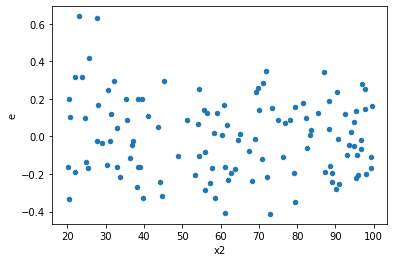

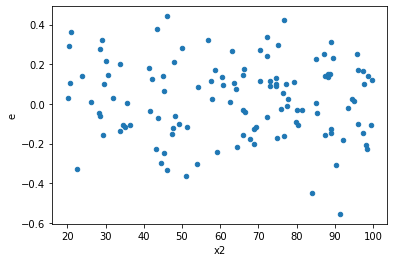

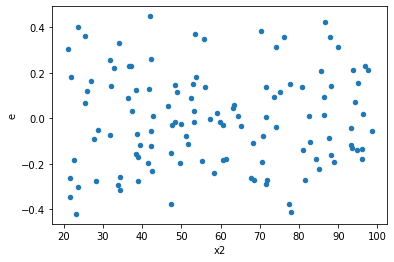

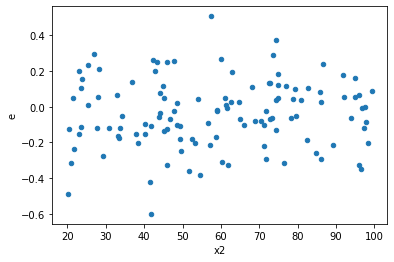

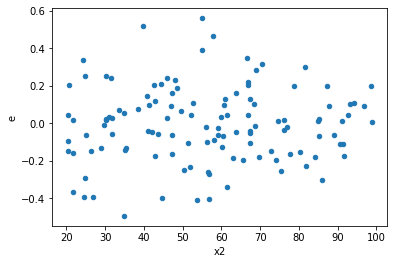

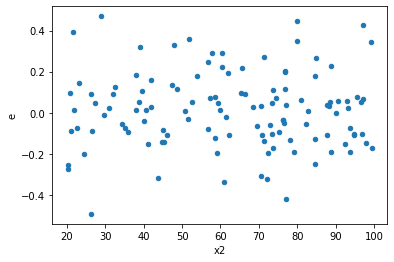

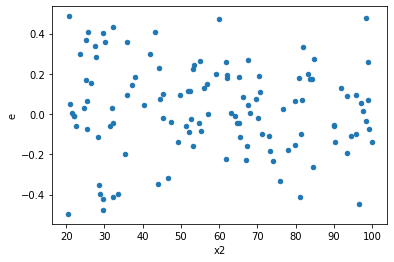

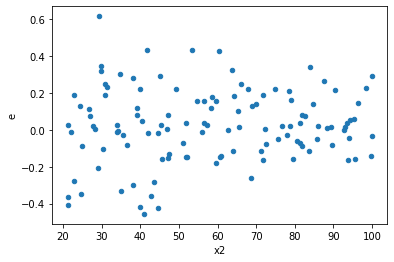

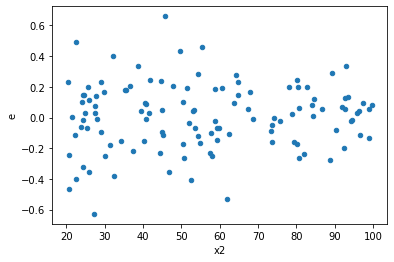

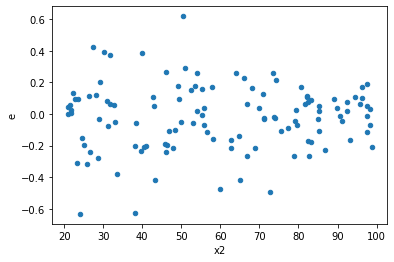

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
15.0,45.0,45.0,1.448839058094535,1.3744720229597043,0.03292816041123943,0.03123800052181146,1.0541058922208493,0.8604917505652523,0.5697541247173739,Reject005=1 : Homoscedasticity
21.0,45.0,45.0,2.163580781058273,2.026365707738079,0.04917229047859711,0.046053766084956343,1.0677148615357093,0.8270190479141868,0.5864904760429066,Reject005=1 : Homoscedasticity
172.0,45.0,45.0,1.6719341104010836,1.2823583356110504,0.03799850250911554,0.029144507627523873,1.3037963445719702,0.3769321242560417,0.8115339378719791,Reject005=1 : Homoscedasticity
549.0,45.0,45.0,1.8927331252376352,1.3748242095618963,0.04301666193721898,0.031246004762770372,1.3767091909450564,0.28727982502492155,0.8563600874875392,Reject005=1 : Homoscedasticity
626.0,45.0,45.0,2.1715132970018005,1.9123794421537919,0.0493525749318591,0.043463169139858905,1.1355033677606168,0.67176769927462,0.66411615036269,Reject005=1 : Homoscedasticity
881.0,45.0,45.0,1.095935190267528,1.0372728649347422,0.024907617960625638,0.023574383293971414,1.056554381509321,0.8544169943123543,0.5727915028438229,Reject005=1 : Homoscedasticity
904.0,45.0,45.0,1.9567436955814155,1.3945884258988528,0.044471447626850354,0.0316951914977012,1.4030976159294004,0.25973614266299316,0.8701319286685034,Reject005=1 : Homoscedasticity
923.0,45.0,45.0,1.4045472856920034,1.159445073890363,0.031921529220272804,0.026351024406599158,1.2113961388263375,0.5227069257134047,0.7386465371432976,Reject005=1 : Homoscedasticity
942.0,45.0,45.0,1.9979744439214655,1.9795034717355608,0.045408510089124214,0.04498871526671729,1.009331113811945,0.9752856820996842,0.5123571589501579,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,2.101413264300324,2.400329306572819,0.0477593923704619,0.05455293878574588,0.8754687361213425,0.657441684849455,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,1.5637125423788412,2.371875317859714,0.03553892141770094,0.0539062572240844,0.6592726567895117,0.1661473169239379,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,1.411179855126048,2.4337043575109707,0.03207226943468291,0.05531146267070388,0.5798485139621922,0.070790613627815,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,1.783820099642289,3.0594929808560223,0.040541365900961114,0.06953393138309141,0.583044351075187,0.0736452455231302,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,1.2619321728408663,2.4085772455930003,0.028680276655474235,0.05474039194529546,0.5239326142227064,0.03253146094256723,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,1.4478350669893427,2.688693422986796,0.032905342431575973,0.061106668704245366,0.5384902029406471,0.04050153674398646,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,1.5903143818113887,2.7138248503465947,0.03614350867753156,0.06167783750787715,0.5860047974755197,0.07635931135894379,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,1.0989992837093894,2.832147566722255,0.024977256447940667,0.06436699015277852,0.3880444990305714,0.0019242168818140567,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,1.4037540282480738,2.9323539126706617,0.031903500642001675,0.0666444071061514,0.47871234852739686,0.015085536653385186,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    641
Reject005=1 : Homoscedasticity      359
Name: Result_test, dtype: int64